In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [2]:
#Download and load dataset
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


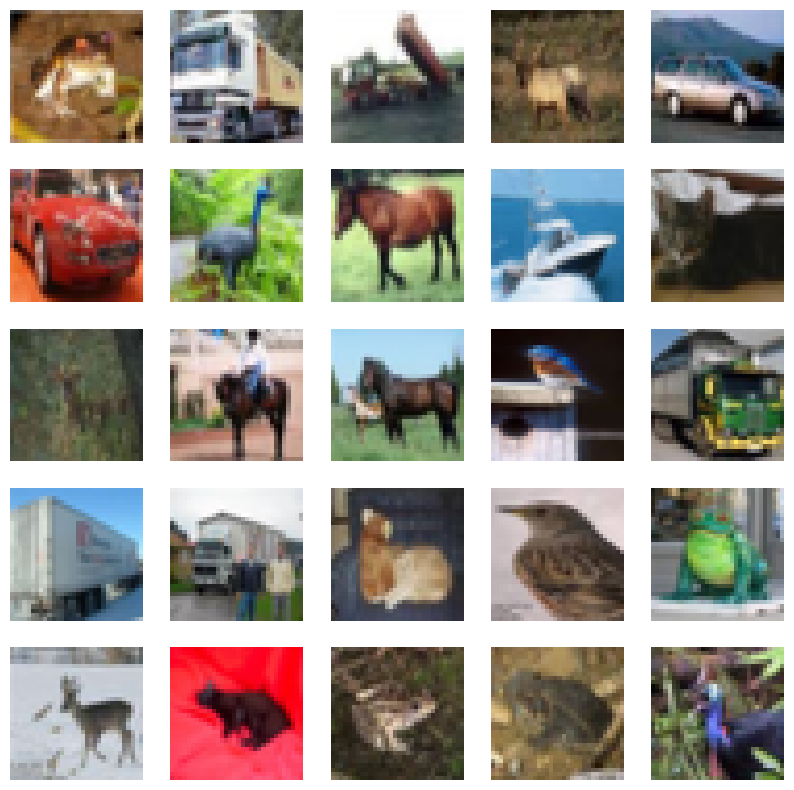

In [3]:
#visualize a few images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()


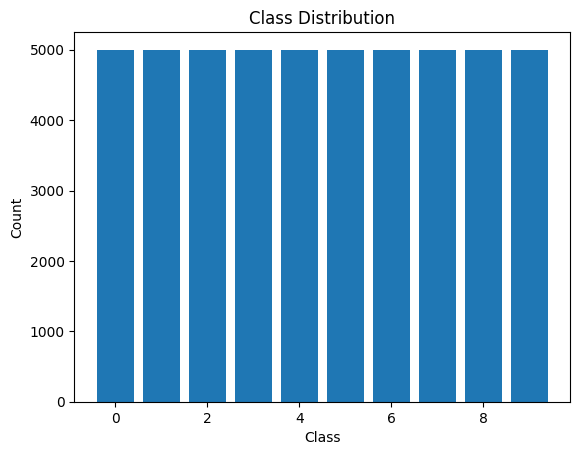

In [4]:
#class distribution
unique,counts = np.unique(y_train,return_counts=True)
plt.bar(unique,counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [5]:
#data normalization

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

#data splitting (we will split a portion for the training set for validation)
X_val = X_train[:10000]
y_val = y_train[:10000]
X_train = X_train[10000:]
y_train = y_train[10000:]

In [7]:
#one hot encoding
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)


In [8]:
#building CNN model
model = Sequential([
                    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                     MaxPooling2D((2,2)),
                    Conv2D(64,(3,3),activation='relu'),
                    MaxPooling2D((2,2)),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dropout(0.5),
                    Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
#training the CNN
history = model.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_val,y_val))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 92ms/step - accuracy: 0.2923 - loss: 1.9103 - val_accuracy: 0.5200 - val_loss: 1.3582
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 100ms/step - accuracy: 0.4819 - loss: 1.4303 - val_accuracy: 0.5782 - val_loss: 1.2058
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.5414 - loss: 1.2836 - val_accuracy: 0.6076 - val_loss: 1.1259
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.5830 - loss: 1.1848 - val_accuracy: 0.6393 - val_loss: 1.0456
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.6103 - loss: 1.1077 - val_accuracy: 0.6364 - val_loss: 1.0507
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 90ms/step - accuracy: 0.6274 - loss: 1.0540 - val_accuracy: 0.6550 - val_loss: 0.9707
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 87ms/step - accuracy: 0.6516 - loss: 0.9916 - val_accuracy: 0.6633 - val_loss: 0.9631
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 91ms/step - accuracy: 0.6620 - loss: 0.9610 

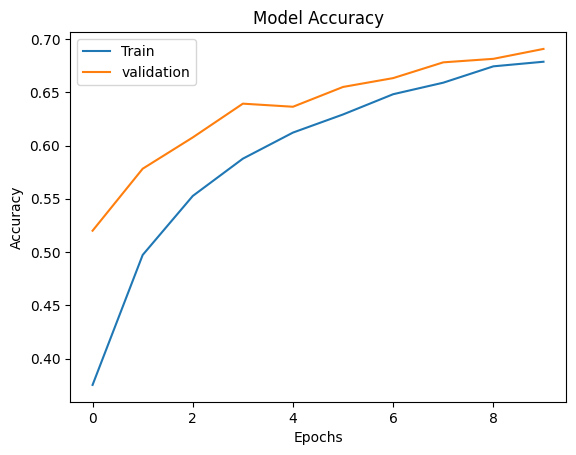

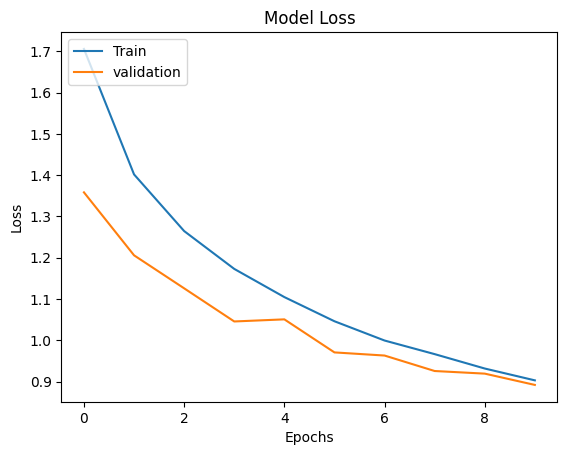

In [11]:
#plot training and validation curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [12]:
#evaluating the model
loss,accuracy = model.evaluate(X_test,y_test)
print(f'Test Loss:{loss:.4f}')
print(f'Test Accuracy:{accuracy:4f}')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)

print(classification_report(y_test,y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6869 - loss: 0.8915
Test Loss:0.9001
Test Accuracy:0.685500
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1000
           1       0.82      0.79      0.80      1000
           2       0.60      0.52      0.56      1000
           3       0.51      0.46      0.48      1000
           4       0.65      0.60      0.62      1000
           5       0.56      0.63      0.59      1000
           6       0.76      0.76      0.76      1000
           7       0.73      0.77      0.75      1000
           8       0.77      0.80      0.78      1000
           9       0.79      0.75      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.68      0.69      0.68     10000
weighted avg       0.68      0.69      0.68     10000



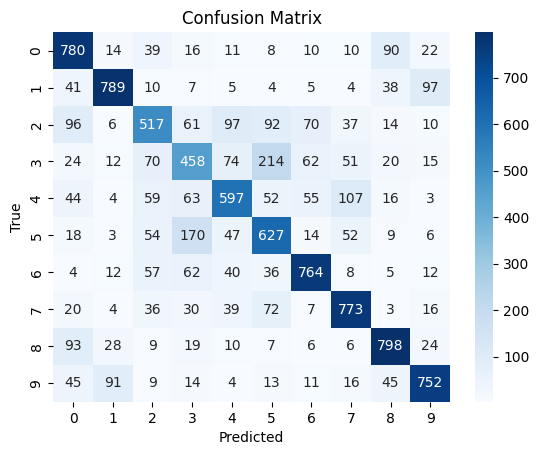

In [14]:
#visualization : Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()